In [22]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import seaborn as sns


In [23]:
final_data = pd.read_csv('AnalysisData/final_merged_data.csv')

In [24]:
#cleaning data
final_data = final_data.dropna()
final_data

,Unnamed: 0,Zip Code,Total GF Rest,Total Number GF $,Total Number GF $$,Total Number GF $$$,Total Number GF $$$$,"Num of Households with income $200,000 or more",Median family income,"Percent of households with income over $200,000",ALL Total
0,0,90006,26,7,15,2,0,155.0,32273.0,0.795933,217
1,1,90028,135,37,77,16,1,399.0,45905.0,2.462811,287
2,2,90032,7,3,4,0,0,268.0,45433.0,1.998658,67
3,3,90033,7,2,5,0,0,102.0,31595.0,0.774487,140
4,4,90035,43,5,35,1,0,1922.0,98792.0,14.627093,107
5,5,90038,43,12,22,5,4,284.0,36937.0,2.478618,116
7,7,90056,3,1,2,0,0,435.0,109595.0,13.039568,10
8,8,90059,1,1,0,0,0,43.0,36358.0,0.414618,42
9,9,90067,28,2,18,5,1,542.0,175368.0,37.199725,80
11,11,90211,28,5,12,8,2,599.0,122841.0,16.401972,49


In [25]:
#calculating percentage of total restaurants that are gluten free
final_data["Percent of Total Restaurants"] = final_data["Total GF Rest"]/final_data["ALL Total"]*100

In [26]:
final_data
print(final_data.shape)


(79, 12)


In [27]:
#getting rid of "bad" data... Gf restaurants cannot account for more than the total number of restaurants
final_data = final_data.loc[final_data["Percent of Total Restaurants"]<=100]
print(final_data.shape)

(77, 12)


Random: selected random ZIP codes in Southern California
independent conditions: selected less than 10% of the total ZIP codes in Southern California
By the residual plot having no real pattern using a LSRL is appropriate.

r-squared: 0.337598
0.5810319354998918


Text(0, 0.5, 'Percentage of GF Friendly Restaurants')

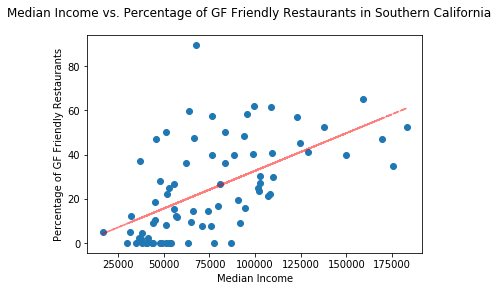

In [30]:
x_axis = final_data["Median family income"]
y = final_data['Percent of Total Restaurants']



(slope, intercept, r_value, p_value, std_err) = linregress(x_axis, y)
print("r-squared: %f" % r_value**2)
print(r_value)
fit = slope * x_axis + intercept

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y)
fit = slope * x_axis + intercept
# Plot data
fig, ax = plt.subplots()

ax.plot(x_axis, y, linewidth=0, marker='o')
ax.plot(x_axis, fit,alpha = 0.5,linestyle = '--', color="red")

fig.suptitle("Median Income vs. Percentage of GF Friendly Restaurants in Southern California")
ax.set_xlabel("Median Income")
ax.set_ylabel("Percentage of GF Friendly Restaurants")


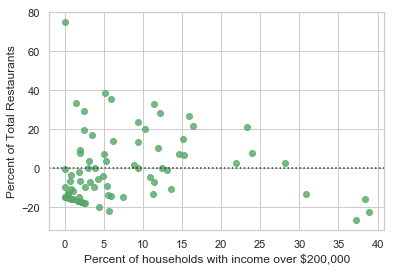

In [36]:


sns.residplot(x_axis, y, lowess=True, color="g")


r-squared: 0.290926
0.5393756436464537


Text(0, 0.5, 'Percentage of GF Friendly Restaurants')

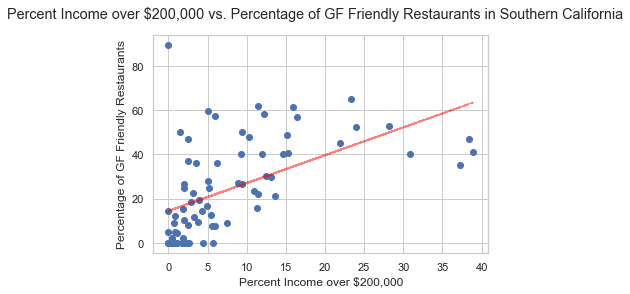

In [32]:
x_axis = final_data["Percent of households with income over $200,000"]
y = final_data['Percent of Total Restaurants']



(slope, intercept, r_value, p_value, std_err) = linregress(x_axis, y)
print("r-squared: %f" % r_value**2)
print(r_value)
fit = slope * x_axis + intercept

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y)
fit = slope * x_axis + intercept
# Plot data
fig, ax = plt.subplots()

ax.plot(x_axis, y, linewidth=0, marker='o')
ax.plot(x_axis, fit,alpha = 0.5,linestyle = '--', color="red")

fig.suptitle("Percent Income over $200,000 vs. Percentage of GF Friendly Restaurants in Southern California")
ax.set_xlabel("Percent Income over $200,000")
ax.set_ylabel("Percentage of GF Friendly Restaurants")



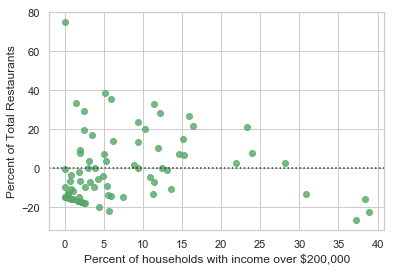

In [37]:


sns.residplot(x_axis, y, lowess=False, color="g")
